In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split



In [5]:
data_dir = '../../dataset/cropped_coins'
image_size = (224, 224)  # Resize images to fit MobileNetV2 input size (224x224)

# Initialize lists for images and labels
images = []
labels = []

# Loop through each folder (representing each label) in the dataset directory
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)

    # Check if it is a folder (not a file)
    if os.path.isdir(folder_path):
        label = folder_name  # Folder name is the label (e.g., '1 euro', '2 euro', etc.)
        for filename in os.listdir(folder_path):
            # Check if the file is an image (.jpg or .jpeg)
            if filename.endswith('.jpg') or filename.endswith('.jpeg'):
                img_path = os.path.join(folder_path, filename)

                # Load and resize the image
                img = image.load_img(img_path, target_size=image_size)

                # Convert the image to a numpy array
                img_array = image.img_to_array(img)

                # Append the image and its corresponding label
                images.append(img_array)
                labels.append(label)

# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Encode labels as integers (e.g., '1 euro' -> 0, '2 euro' -> 1, ...)
label_dict = {label: idx for idx, label in enumerate(sorted(set(labels)))}
labels = np.array([label_dict[label] for label in labels])

# One-hot encode labels (e.g., [1, 0, 0] for '1 euro', [0, 1, 0] for '2 euro', etc.)
labels = to_categorical(labels, num_classes=len(label_dict))

# Normalize the images (scale pixel values to [0, 1])
images = images / 255.0

# Split data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Check the shape of the data
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)

Training data shape: (1188, 224, 224, 3)
Validation data shape: (298, 224, 224, 3)


In [6]:
print(labels)
print(label_dict)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
{'0.01': 0, '0.02': 1, '0.05': 2, '0.10': 3, '0.20': 4, '0.50': 5, '1': 6, '2': 7}


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\mouha\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.1099 - loss: 4.3548 - val_accuracy: 0.1309 - val_loss: 2.0729
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 923ms/step - accuracy: 0.1549 - loss: 2.0794 - val_accuracy: 0.2081 - val_loss: 2.0357
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1988 - loss: 2.0433 - val_accuracy: 0.2617 - val_loss: 1.9379
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.2476 - loss: 1.9279 - val_accuracy: 0.3255 - val_loss: 1.7437
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.3447 - loss: 1.7681 - val_accuracy: 0.4027 - val_loss: 1.5481
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.3885 - loss: 1.5933 - val_accuracy: 0.4128 - val_loss: 1.5094
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.4376 - loss: 1.4261 - val_accuracy: 0.4832 - val_loss: 1.2725
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.4592 - loss: 1.3161 - val_accuracy: 0.5470 - val_lo

In [9]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 327ms/step - accuracy: 0.5425 - loss: 1.1614
Validation Loss: 1.13466477394104
Validation Accuracy: 0.5402684807777405


Matplotlib is building the font cache; this may take a moment.


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step
[[12 22 11  0  1  3  1  1]
 [ 2  4  7  0  1  0  0  0]
 [13  9 21  2  2  0  0  0]
 [ 0  1  1 49 30 19  2  0]
 [ 0  0  0  0  4  3  0  0]
 [ 0  1  0  0  1  3  0  0]
 [ 0  1  1  0  0  0 41  0]
 [ 1  1  0  0  0  0  0 27]]


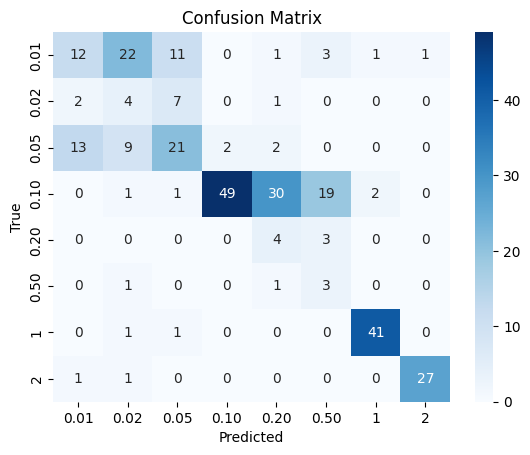

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred=model.predict(X_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
cm=confusion_matrix(y_pred_classes,y_true)
print(cm)
class_labels = ['0.01', '0.02', '0.05', '0.10', '0.20', '0.50', '1', '2']

import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=class_labels, yticklabels=class_labels)
# Display the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step
[[106  48  19   4   4   4   0   0]
 [  3  74   4   1   0   2   1   0]
 [ 20  26 131   3   4   2   0   1]
 [  1   2   1 170  83  87   3   0]
 [  1   0   1   1  63   6   1   0]
 [  0   0   0   0   0  30   0   0]
 [  0   0   0   2   0   0 154   1]
 [  0   2   3   1   2   0   0 116]]


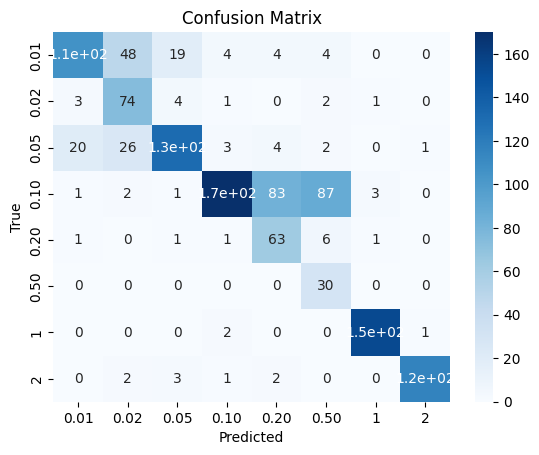

In [11]:
y_pred=model.predict(X_train)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_train,axis=1)
cm=confusion_matrix(y_pred_classes,y_true)
print(cm)
class_labels = ['0.01', '0.02', '0.05', '0.10', '0.20', '0.50', '1', '2']


sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=class_labels, yticklabels=class_labels)
# Display the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
from sklearn.metrics import f1_score, accuracy_score
accuracy=accuracy_score(y_true,y_pred_classes)
f1_score_weighted=f1_score(y_true,y_pred_classes,average='weighted')
f1_score_macro=f1_score(y_true,y_pred_classes,average='macro')
print(f"the accuracy score is : {accuracy}")
print(f"the weighted F1 score is : {f1_score_weighted}")

print(f"the macro F1 score is {f1_score_macro}")

the accuracy score is : 0.7104377104377104
the weighted F1 score is : 0.6927043466604931
the macro F1 score is 0.6939445723545363


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


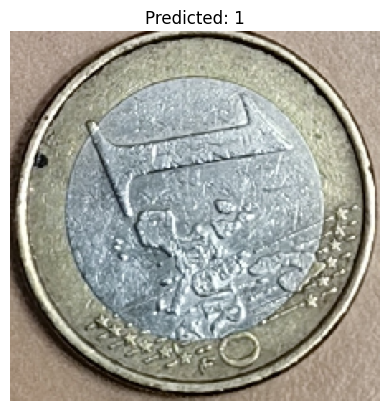

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


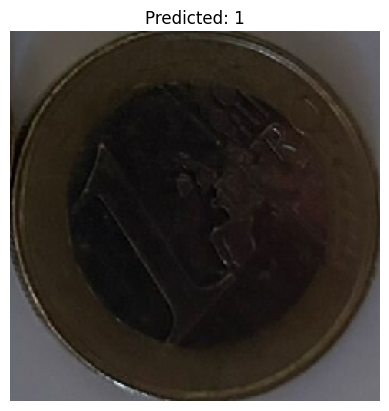

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


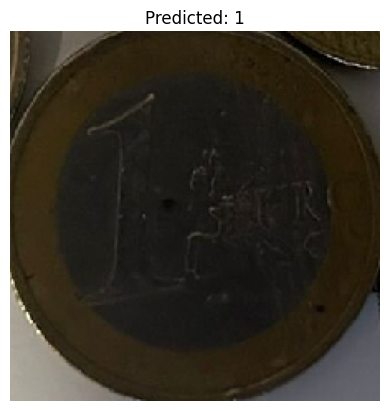

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


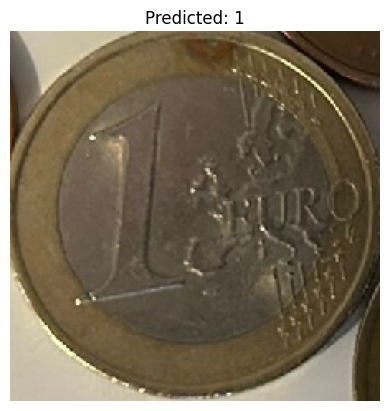

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


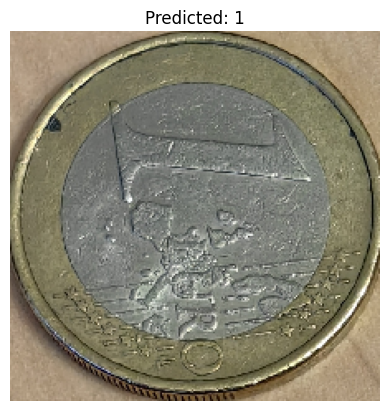

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


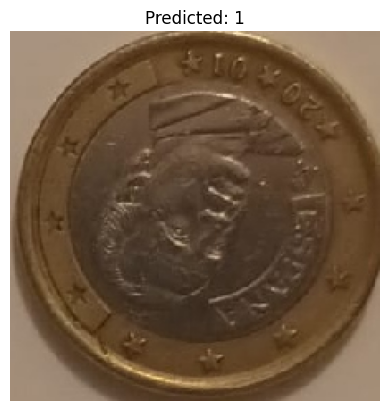

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


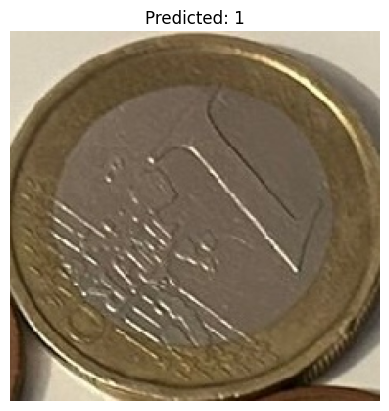

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


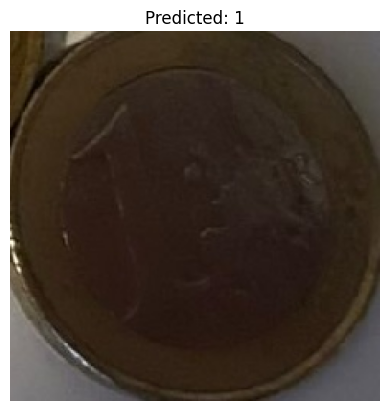

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


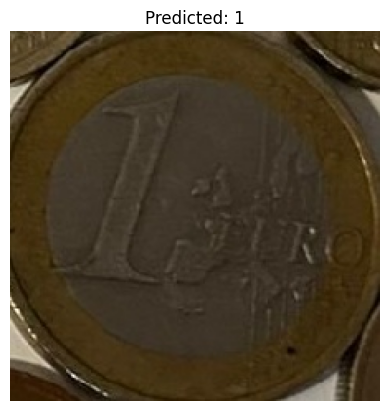

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


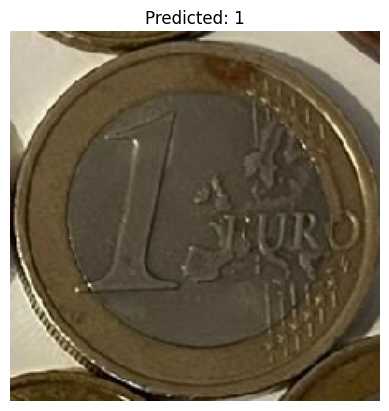

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


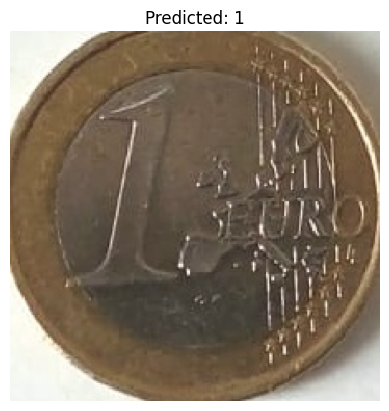

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


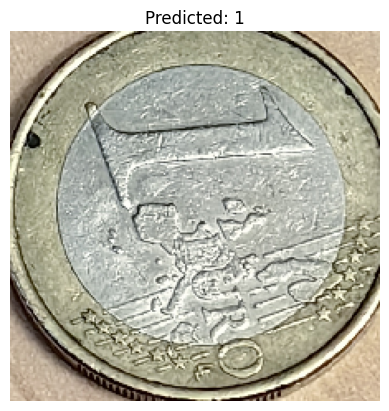

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


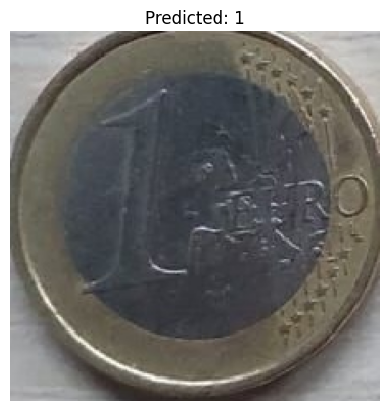

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


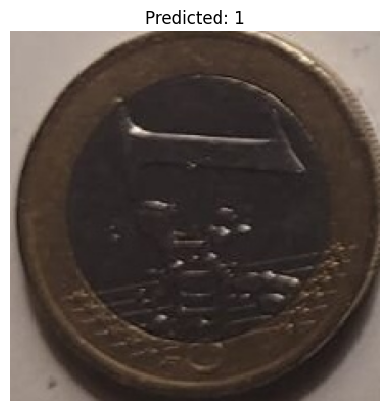

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


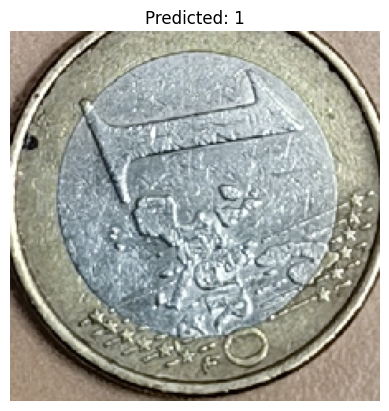

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


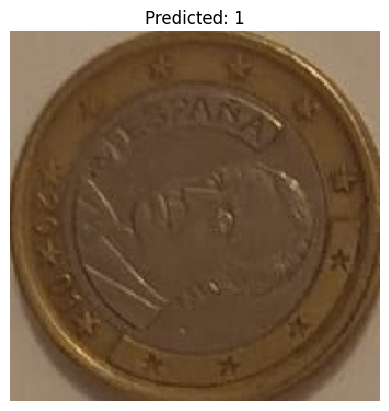

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


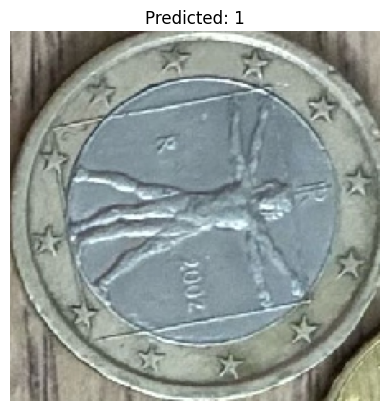

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


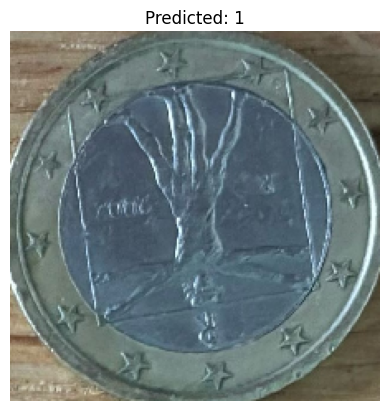

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


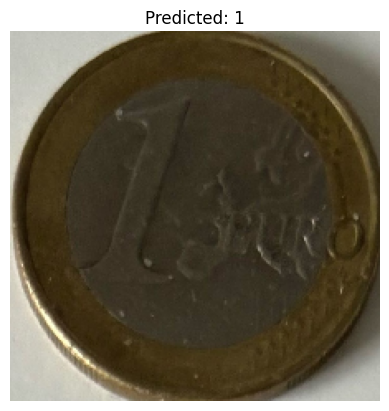

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


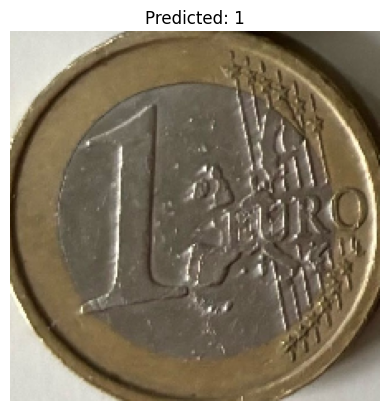

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


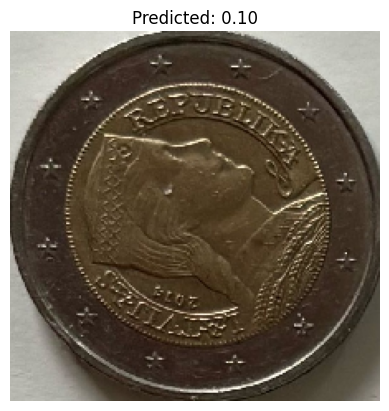

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


KeyboardInterrupt: 

In [13]:
import matplotlib.pyplot as plt

# Path to the directory containing all the fox images
fox_directory = os.path.join(data_dir, '1')

# Initialize list for storing results
image_names = []
predicted_labels = []

# Loop through each image in the 'fox' directory
for filename in os.listdir(fox_directory):
    # Check if the file is an image (.jpg or .jpeg)
    if filename.endswith('.jpg') or filename.endswith('.jpeg'):
        img_path = os.path.join(fox_directory, filename)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))  # Resize to match the model input size
        img_array = image.img_to_array(img)  # Convert to numpy array
        img_array = img_array / 255.0  # Normalize the image (same as during training)

        # Add a batch dimension (model expects a batch of images)
        img_array = np.expand_dims(img_array, axis=0)

        # Make a prediction
        prediction = model.predict(img_array)

        # Get the predicted class (index of the highest probability)
        predicted_class = np.argmax(prediction, axis=1)

        # Map predicted class index to class label
        reverse_label_dict = {v: k for k, v in label_dict.items()}
        predicted_label = reverse_label_dict[predicted_class[0]]

        # Store the result
        image_names.append(filename)
        predicted_labels.append(predicted_label)

        # Optionally, display the image and its prediction
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Predicted: {predicted_label}")
        plt.show()

# Print the results
for img_name, label in zip(image_names, predicted_labels):
    print(f"Image: {img_name}, Predicted Label: {label}")


In [19]:

import os
model_save_path = os.path.join('coinDetector', 'code', 'classification', 'saved_model')

# Make sure the directory exists
os.makedirs(model_save_path, exist_ok=True)

# Save the model in the specified directory
model.save(os.path.join(model_save_path, 'coin_detection_model.h5'))

print("Model saved at:", os.path.join(model_save_path, 'coin_detection_model.h5'))


Model saved at: coinDetector\code\classification\saved_model\coin_detection_model.h5
